# PyTorch

## Basic model

### Dense Layer

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class MyModel(nn.Module):
    def __init__(self): # class 초기화
        super().__init__() # 부모 클래스(nn.Module의 __init__()) 상속
        dense = nn.Linear(10, 10) # dense layer: 10개의 input, 10개의 output
        nn.init.kaiming_normal_(dense.weight) # weight 초기화(He 초기화: ReLU 활성화 함수 사용 시)
        self.Dense_Layer = nn.Sequential(dense, nn.ReLU()) # sequential: 순차적으로 층을 쌓음(dense layer, ReLU(activation)))
    
    def forward(self, x): # forward propagation
        return self.Dense_Layer(x) # Dense_Layer에 x를 넣어서 결과를 반환
    
print(MyModel())

MyModel(
  (Dense_Layer): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
)


### 함수형 API(like tensorflow/keras)

In [3]:
class MyModel(nn.Module):
    def __init__(self, input_size = 64, activation = nn.ReLU):
        super(MyModel, self).__init__() # 부모 클래스(nn.Module의 __init__()) 상속
        # sequential: 순차적으로 층을 쌓음
        self.extractor1 = nn.Sequential(nn.Linear(input_size, 300),
                                                    activation(),
                                                    nn.Linear(300, 100),
                                                    activation())
        
        self.extractor2 = nn.Sequential(nn.Linear(input_size, 200),
                                                    activation())
        
        self.classifier = nn.Sequential(nn.Linear(300, 100),
                                        activation(),
                                        nn.Linear(100, 10),
                                        nn.Softmax())
    
    def forward(self, inputs):
        x1 = self.extractor1(inputs) # extractor1에 inputs를 넣어서 결과를 반환
        x2 = self.extractor2(inputs) # extractor2에 inputs를 넣어서 결과를 반환
        x = torch.cat((x1, x2), dim = 1) # x1과 x2를 합침
        x = self.classifier(x) # classifier에 x를 넣어서 결과를 반환
        return x
    
model = MyModel()
model

MyModel(
  (extractor1): Sequential(
    (0): Linear(in_features=64, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=100, bias=True)
    (3): ReLU()
  )
  (extractor2): Sequential(
    (0): Linear(in_features=64, out_features=200, bias=True)
    (1): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
    (3): Softmax(dim=None)
  )
)

In [4]:
from torchinfo import summary

summary(model, input_size = (1, 64))

/Users/yunho/opt/anaconda3/envs/basicstudy/lib/python3.8/site-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 100]                  --
│    └─Linear: 2-1                       [1, 300]                  19,500
│    └─ReLU: 2-2                         [1, 300]                  --
│    └─Linear: 2-3                       [1, 100]                  30,100
│    └─ReLU: 2-4                         [1, 100]                  --
├─Sequential: 1-2                        [1, 200]                  --
│    └─Linear: 2-5                       [1, 200]                  13,000
│    └─ReLU: 2-6                         [1, 200]                  --
├─Sequential: 1-3                        [1, 10]                   --
│    └─Linear: 2-7                       [1, 100]                  30,100
│    └─ReLU: 2-8                         [1, 100]                  --
│    └─Linear: 2-9                       [1, 10]                   1,

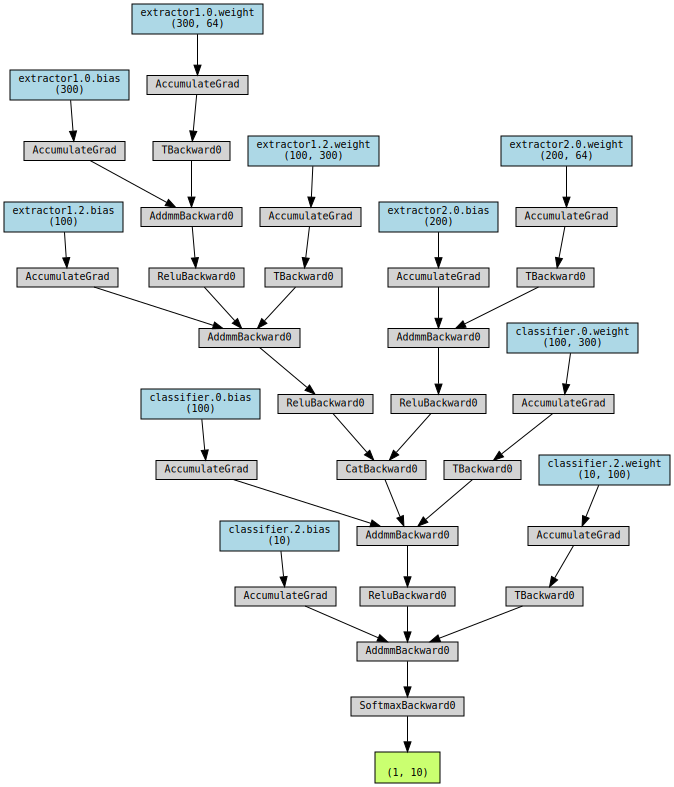

In [5]:
from torchviz import make_dot

x = torch.randn(1, 64)     # dummy input
make_dot(model(x), params=dict(model.named_parameters()))

## Vanila PyTorch Example

### Import packages

In [6]:
import torch as th
import torch.nn as nn # neural network module
import torch.nn.functional as F # neural network functional(relu, softmax 등 activation function) module
import torch.optim as optim # optimizer(adam 등) module
import torchvision # computer vision module
import torchvision.transforms as transforms # image preprocessing, augmentation module
import matplotlib.pyplot as plt # visualization module
import numpy as np # linear algebra module

from torchvision.datasets import MNIST # MNIST dataset module
from torch.utils.data import DataLoader, Dataset, random_split # data loader module

In [7]:
import random

seed = 1004
random.seed(seed)
th.manual_seed(seed)

In [8]:
# # cuda 사용 가능하면 cuda 사용(only for Windows)
# if th.cuda.is_available():
#     th.cuda.manual_seed(seed)
#     device = th.device('cuda')

### Load Dataset

In [9]:
transform = transforms.Compose([transforms.ToTensor(), # ToTensor(): numpy array(image)를 tensor로 변환
                                transforms.Normalize((0.1307,), (0.3081,))]) # Normalize(): image normalization(평균, 표준편차)

train_dataset = MNIST(root = './data', train = True, download = True, transform = transform) # train dataset
test_dataset = MNIST(root = './data', train = False, download = True, transform = transform) # test dataset

In [10]:
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ))

In [11]:
train_dataset, val_dataset = random_split(train_dataset, [54000, 6000]) # train dataset을 train dataset과 validation dataset으로 나눔
len(train_dataset), len(val_dataset)

(54000, 6000)

In [12]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

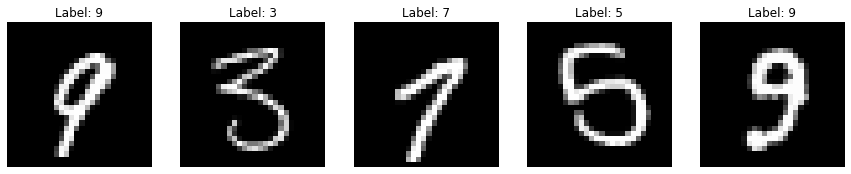

In [13]:
num_sample = 5
random_idx = np.random.randint(0, len(train_dataset), num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idx):
    img, label = train_dataset[idx]
    plt.subplot(1, num_sample, i+1)
    plt.title(f'Label: {label}')
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis(False)

### DataLoader (by batch size)

In [14]:
batch_size = 64 # batch size

train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True, drop_last = True) # train dataset을 batch size만큼 나눔
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle = False, drop_last = True) # drop_last: 마지막 batch를 버리고 다시 처음부터 batch size만큼 나눔
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False, drop_last = True)

### Model

In [15]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # self.flatten = nn.Flatten(start_dim = 2, end_dim = 3) # Flatten(): 2차원으로 변환
        self.fc1 = nn.Linear(28*28, 256) # fully connected layer
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # x = self.flatten(x) # x = x.view(-1, 28*28)로 대체 가능
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        out = F.log_softmax(x, dim = 1) # log_softmax(): log를 취한 softmax
        return out

In [16]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.flatten = nn.Flatten(start_dim = 2, end_dim = 3) # Flatten(): 2차원으로 변환
#         self.fc1 = nn.Linear(28*28, 256) # fully connected layer
#         self.fc2 = nn.Linear(256, 64)
#         self.fc3 = nn.Linear(64, 10)
        
#     def forward(self, x):
#         x = self.flatten(x) # x = x.view(-1, 28*28)로 대체 가능
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         out = F.log_softmax(x, dim = 1) # log_softmax(): log를 취한 softmax
#         return x

### Train, Test function

In [17]:
device = th.device('cuda' if th.cuda.is_available() else 'cpu') # cuda 사용 가능하면 cuda 사용

In [18]:
def train(model, train_loader, optimizer, epoch, device):
    model.train()
    train_losses = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device) # cuda 사용 가능하면 cuda 사용
        optimizer.zero_grad() # optimizer gradient 초기화
        output = model(data) # model에 data를 넣어서 output 반환
        loss = F.nll_loss(output, target) # negative log likelihood loss(nll) 계산
        train_losses.append(loss.item()) # loss(scalar(0차원 tensor) -> float)를 list에 append
        
        loss.backward() # loss를 backpropagation(gradient 계산된 tensor를 각 layer에 저장)
        optimizer.step() # optimizer gradient update(optimizer에 저장된 gradient를 각 node의 weight에 적용)
        
        if batch_idx % 100 == 0: # 100번째 batch마다 loss 출력
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
            
    return np.mean(train_losses) # epoch마다 train loss의 평균 반환

In [19]:
def test(model, test_loader, device):
    model.eval() # model evaluation에서 안 쓰는 layer들을 끔
    test_loss = 0
    correct = 0
    
    with th.no_grad(): # with 안에서는 gradient 계산 안함
        for data, target in test_loader:
            data, target = data.to(device), target.to(device) # cuda 사용 가능하면 cuda 사용
            output = model(data) # model에 data를 넣어서 output 반환
            test_loss += F.nll_loss(output, target, reduction = 'sum').item() # output(logit) 받아서 loss 계산
            pred = output.argmax(dim = 1, keepdim = True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item() # correct 예측 개수(pred.eq(): tensor의 element-wise 비교)
            
    test_loss /= len(test_loader.dataset) # test loss의 평균
        
    print(f'\nTest set: Average loss: {test_loss:.4f}, '
          f'Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset)}%)\n')

    return test_loss

In [20]:
import copy

def run(model,
        train_loader,
        val_loader,
        test_loader,
        optimizer,
        num_epoch):
    
    device = th.device('cuda' if th.cuda.is_available() else 'cpu') # cuda 사용 가능하면 cuda 사용
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.7) # learning rate scheduler(optim.lr에 있는 scheduler)
    model = model.to(device)
    train_losses = [] # train loss 저장
    val_losses = [] # validation loss 저장
    
    best_model = None
    min_val_loss = np.inf
    
    for epoch in range(1, num_epoch + 1):
        train_loss = train(model, train_loader, optimizer, epoch, device)
        val_loss = test(model, val_loader, device)
        scheduler.step() # learning rate scheduler step
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        if val_loss < min_val_loss:
            min_val_loss = val_loss 
            best_model = copy.deepcopy(model) # deep copy

    th.save(best_model.state_dict(), 'mnist.pt')

    test_loss = test(best_model, test_loader, device)

    return best_model, train_losses, val_losses, test_loss


### Run

In [21]:
model = Net()
optimizer = optim.Adadelta(model.parameters(), lr = 1.0) # optimizer(optim에 있는 optimizer)
history = run(model, train_loader, val_loader, test_loader, optimizer, 14)

Train Epoch: 1 [0/54000 (0%)]	Loss: 2.304229
Train Epoch: 1 [6400/54000 (12%)]	Loss: 0.152449
Train Epoch: 1 [12800/54000 (24%)]	Loss: 0.302747
Train Epoch: 1 [19200/54000 (36%)]	Loss: 0.376179
Train Epoch: 1 [25600/54000 (47%)]	Loss: 0.168665
Train Epoch: 1 [32000/54000 (59%)]	Loss: 0.190544
Train Epoch: 1 [38400/54000 (71%)]	Loss: 0.150422
Train Epoch: 1 [44800/54000 (83%)]	Loss: 0.112038
Train Epoch: 1 [51200/54000 (95%)]	Loss: 0.074718

Test set: Average loss: 0.1238, Accuracy: 5731/6000 (95.51666666666667%)

Train Epoch: 2 [0/54000 (0%)]	Loss: 0.178586
Train Epoch: 2 [6400/54000 (12%)]	Loss: 0.013479
Train Epoch: 2 [12800/54000 (24%)]	Loss: 0.102260
Train Epoch: 2 [19200/54000 (36%)]	Loss: 0.131258
Train Epoch: 2 [25600/54000 (47%)]	Loss: 0.203414
Train Epoch: 2 [32000/54000 (59%)]	Loss: 0.007547
Train Epoch: 2 [38400/54000 (71%)]	Loss: 0.031213
Train Epoch: 2 [44800/54000 (83%)]	Loss: 0.122919
Train Epoch: 2 [51200/54000 (95%)]	Loss: 0.089201

Test set: Average loss: 0.0733, Accu

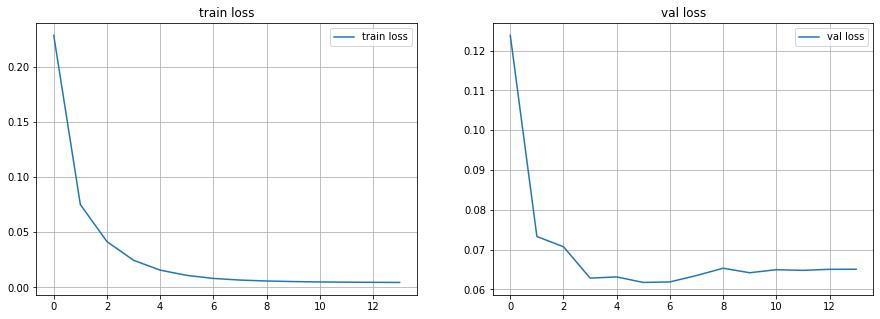

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(history[1], label = 'train loss')
ax[1].plot(history[2], label = 'val loss')
ax[0].set_title('train loss')
ax[1].set_title('val loss')
ax[0].legend()
ax[1].legend()
ax[0].grid()
ax[1].grid()

### Result

In [23]:
model = Net() # model 생성
model.load_state_dict(th.load('mnist.pt')) # best model 불러오기
test(model, test_loader, th.device('cuda' if th.cuda.is_available() else 'cpu')) # test


Test set: Average loss: 0.0633, Accuracy: 9818/10000 (98.18%)



0.06327913996970747

In [24]:
best_model = history[0] # history[0]에 best model 저장
print(best_model)
test(best_model, test_loader, th.device('cuda' if th.cuda.is_available() else 'cpu'))

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Test set: Average loss: 0.0633, Accuracy: 9818/10000 (98.18%)



0.06327913996970747

In [25]:
pred_ys = best_model(th.stack([test_dataset[i][0] for i in range(len(test_dataset))]).to(device)).argmax(dim = 1).cpu().numpy() # test dataset의 예측값

In [26]:
(pred_ys == np.array([test_dataset[i][1] for i in range(len(test_dataset))])).sum() / len(test_dataset) # test dataset의 accuracy

0.9834

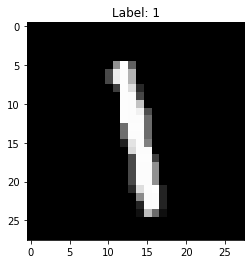

In [27]:
plt.imshow(test_dataset[1004][0].squeeze(), cmap='gray')
plt.title(f'Label: {pred_ys[1004]}')
plt.show()

## Pytorch Lightning

In [1]:
import torch as th
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchmetrics import Accuracy # Accuracy 계산해주는 metric
from torchvision import transforms
from torchvision.datasets import MNIST


from pytorch_lightning import LightningModule, Trainer # LightningModule: pytorch model을 wrapping해주는 class
from pytorch_lightning.callbacks.progress.tqdm_progress import TQDMProgressBar
from pytorch_lightning.loggers import TensorBoardLogger

In [2]:
import warnings
warnings.filterwarnings('ignore', '.*does not have many workers.*')

In [3]:
import os

# find DATASET_PATH from environment variable, if not, use './data'
DATASET_PATH = os.environ.get('DATASET_PATH', './data')
BATCH_SIZE = 256 if th.cuda.is_available() else 64

In [10]:
class LitMNISTModel(LightningModule):
    def __init__(self, 
                data_dir: str = DATASET_PATH, # data_dir: dataset이 저장되어 있는 경로 (loader에서 사용하기 위해서)
                hidden_dim: int = 128, # hidden_dim: hidden layer의 dimension
                learning_rate: float = 2e-4):
        
        super().__init__()
        self.hidden_dim = hidden_dim 
        self.num_classes = 10
        self.learning_rate = learning_rate
        
        self.input_dims = (1, 28, 28) # input image의 dimension
        self.transform = transforms.Compose([ # transform: image를 어떻게 변환할지 정의
            transforms.ToTensor(), # image를 tensor로 변환
            transforms.Normalize((0.1307,), (0.3081,)) # image를 normalize(평균, 표준편차)
        ])
        
        channels, width, height = self.input_dims # input image의 dimension을 각각 channels, width, height로 저장
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(channels * width * height, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim, self.num_classes),
        )
        
        self.val_acc = Accuracy(task='multiclass', # val_acc: validation accuracy를 계산하기 위한 metric, multiclass classification을 위한 metric, num_classes: class의 개수
                                num_classes=self.num_classes)
        self.test_acc = Accuracy(task='multiclass',
                                num_classes=self.num_classes)

    def forward(self, x):
        x = self.model(x)
        out = F.log_softmax(x, dim=1)
        return out

    def training_step(self, batch, batch_idx):
        x, y = batch # batch: (x, y) tuple, 데이터 불러오기
        logits = self(x) # == self.forward(x), output 지정
        loss = F.nll_loss(logits, y) # loss function 지정
        self.log('train_loss', loss) # log: tensorboard에 loss를 기록
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = th.argmax(logits, dim=1)
        self.val_acc.update(preds, y) # update: metric(valudation acc)을 update
        
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', self.val_acc, prog_bar=True)

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = th.argmax(logits, dim=1)
        self.test_acc.update(preds, y)
        
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', self.test_acc, prog_bar=True)

    def configure_optimizers(self):
        optimizer = th.optim.Adam(self.parameters(), lr=self.learning_rate) # optimizer(Adam) 지정
        return optimizer

    def prepare_data(self):
        MNIST(DATASET_PATH, train=True, download=True)
        MNIST(DATASET_PATH, train=False, download=True)

    def setup(self, stage=None): # stage: fit, test, predict 중 하나
        if stage == 'fit' or stage is None: # fit: train, validation set 만들기
            mnist_train = MNIST(DATASET_PATH, train=True, transform=self.transform)
            self.mnist_train, self.mnist_val = random_split(mnist_train, [55000, 5000])
            
        if stage == 'test' or stage is None: # test: test set 만들기
            self.mnist_test = MNIST(DATASET_PATH, train=False, transform=self.transform)

    def train_dataloader(self):
        return DataLoader(self.mnist_train, batch_size=BATCH_SIZE, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=BATCH_SIZE, shuffle=False)

    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=BATCH_SIZE, shuffle=False)

In [11]:
model = LitMNISTModel(hidden_dim=256, learning_rate=2e-4)

trainer = Trainer(accelerator='mps', # mps: multi-processing strategy, multi-gpu를 사용할 때 사용(for mac), 
                devices=1,
                max_epochs=5,
                callbacks=[TQDMProgressBar(refresh_rate=20)],
                logger=TensorBoardLogger('lightning_logs', name='mnist'))

trainer.fit(model=model)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type               | Params
------------------------------------------------
0 | model    | Sequential         | 269 K 
1 | val_acc  | MulticlassAccuracy | 0     
2 | test_acc | MulticlassAccuracy | 0     
------------------------------------------------
269 K     Trainable params
0         Non-trainable params
269 K     Total params
1.077     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

NotImplementedError: The operator 'aten::_unique2' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

In [ ]:
trainer.test()